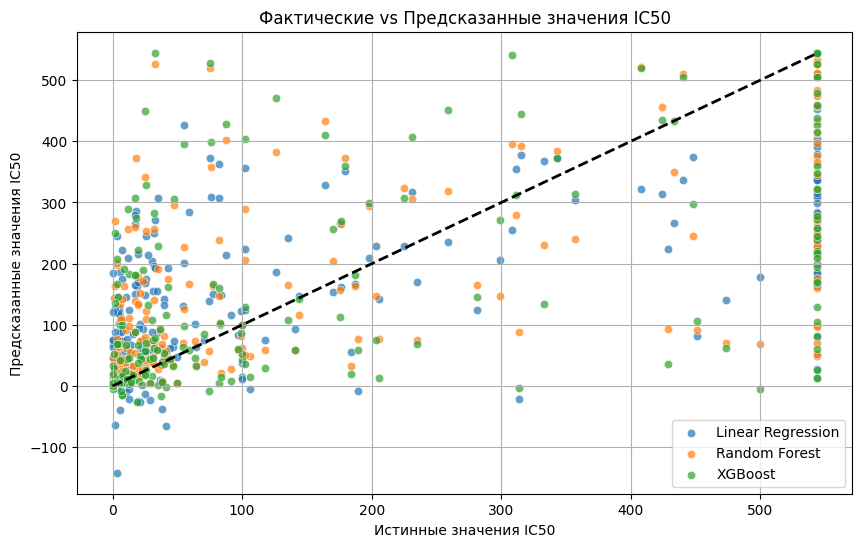

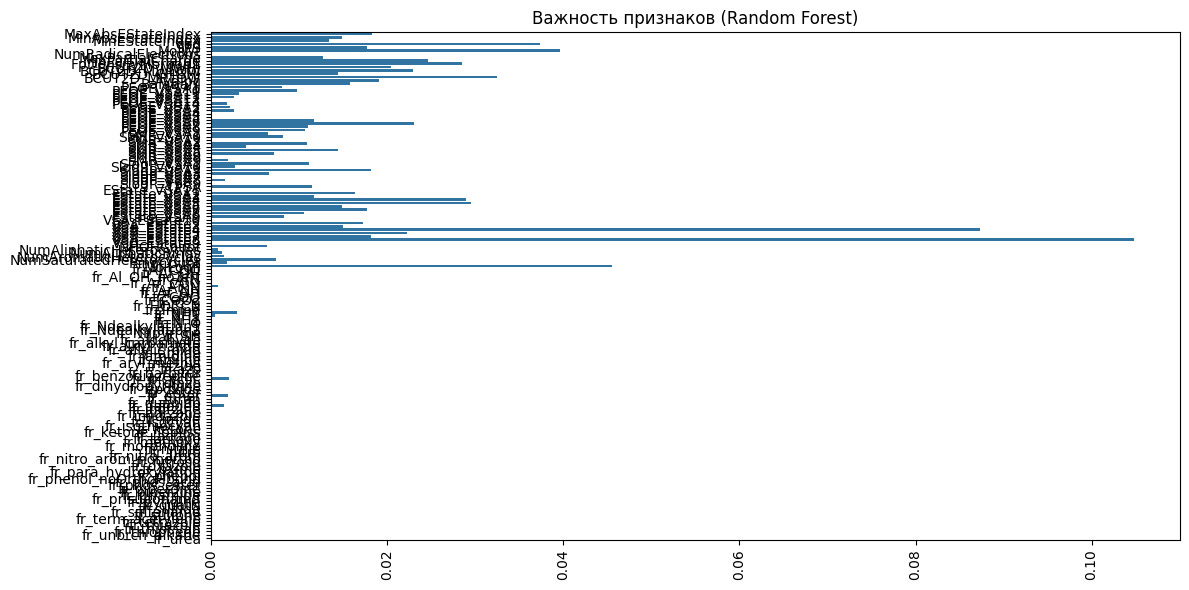

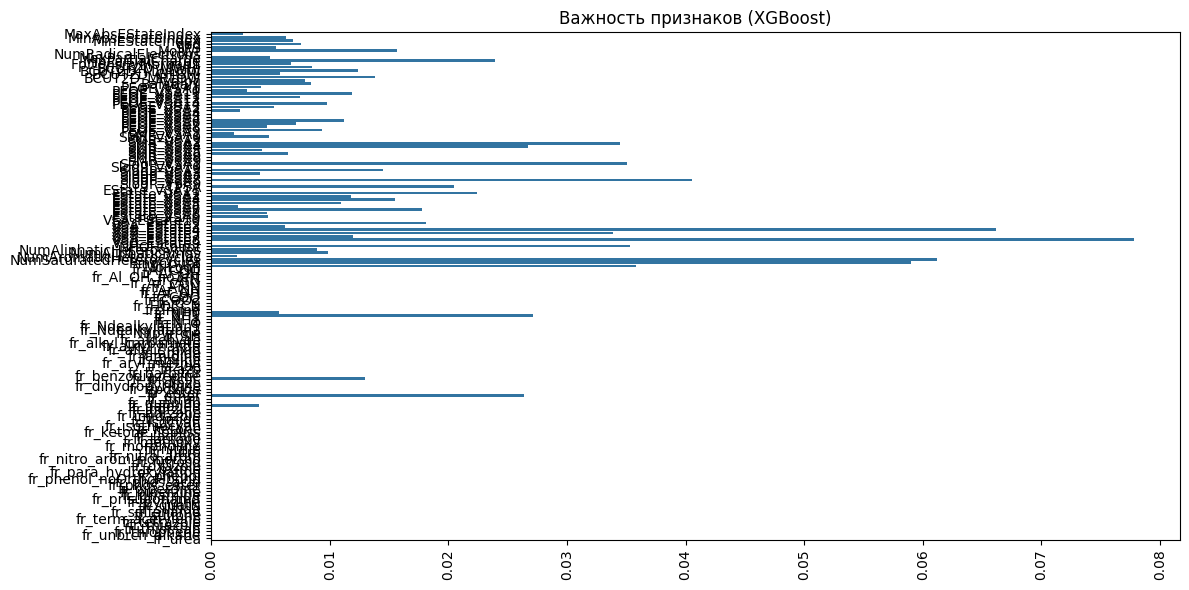

Результаты моделей:
                         RMSE        R²
Random Forest      166.820282  0.351584
Linear Regression  168.358745  0.339570
XGBoost            180.844866  0.237977

Наиболее важные признаки по модели Random Forest:
             Feature  Importance
62       VSA_EState8    0.104797
59       VSA_EState4    0.087371
70           MolLogP    0.045583
5              MolWt    0.039597
3                qed    0.037357
13      BCUT2D_MRLOW    0.032526
51       EState_VSA5    0.029515
50       EState_VSA4    0.028897
9   FpDensityMorgan1    0.028475
8   MinPartialCharge    0.024589


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Список используемых признаков
FEATURES = [
    "MaxAbsEStateIndex", "MinAbsEStateIndex", "MinEStateIndex", "qed", "SPS", "MolWt",
    "NumRadicalElectrons", "MaxPartialCharge", "MinPartialCharge", "FpDensityMorgan1",
    "BCUT2D_MWHI", "BCUT2D_MWLOW", "BCUT2D_CHGHI", "BCUT2D_MRLOW", "AvgIpc", "BalabanJ",
    "PEOE_VSA1", "PEOE_VSA10", "PEOE_VSA11", "PEOE_VSA12", "PEOE_VSA13", "PEOE_VSA14",
    "PEOE_VSA2", "PEOE_VSA3", "PEOE_VSA4", "PEOE_VSA5", "PEOE_VSA6", "PEOE_VSA7", "PEOE_VSA8",
    "PEOE_VSA9", "SMR_VSA1", "SMR_VSA10", "SMR_VSA2", "SMR_VSA3", "SMR_VSA4", "SMR_VSA5",
    "SMR_VSA6", "SMR_VSA8", "SMR_VSA9", "SlogP_VSA1", "SlogP_VSA10", "SlogP_VSA2", "SlogP_VSA3",
    "SlogP_VSA7", "SlogP_VSA8", "SlogP_VSA9", "TPSA", "EState_VSA11", "EState_VSA2", "EState_VSA3",
    "EState_VSA4", "EState_VSA5", "EState_VSA6", "EState_VSA7", "EState_VSA8", "EState_VSA9",
    "VSA_EState10", "VSA_EState2", "VSA_EState3", "VSA_EState4", "VSA_EState5", "VSA_EState7",
    "VSA_EState8", "VSA_EState9", "NHOHCount", "NumAliphaticHeterocycles", "NumAliphaticRings",
    "NumAromaticHeterocycles", "NumSaturatedHeterocycles", "RingCount", "MolLogP", "fr_Al_COO",
    "fr_Al_OH", "fr_Al_OH_noTert", "fr_ArN", "fr_Ar_COO", "fr_Ar_N", "fr_Ar_NH", "fr_Ar_OH",
    "fr_COO", "fr_COO2", "fr_C_S", "fr_HOCCN", "fr_Imine", "fr_NH0", "fr_NH1", "fr_NH2", "fr_N_O",
    "fr_Ndealkylation1", "fr_Ndealkylation2", "fr_Nhpyrrole", "fr_SH", "fr_aldehyde",
    "fr_alkyl_carbamate", "fr_alkyl_halide", "fr_allylic_oxid", "fr_amide", "fr_amidine",
    "fr_aniline", "fr_aryl_methyl", "fr_azide", "fr_azo", "fr_barbitur", "fr_benzodiazepine",
    "fr_bicyclic", "fr_diazo", "fr_dihydropyridine", "fr_epoxide", "fr_ester", "fr_ether",
    "fr_furan", "fr_guanido", "fr_halogen", "fr_hdrzine", "fr_hdrzone", "fr_imidazole",
    "fr_imide", "fr_isocyan", "fr_isothiocyan", "fr_ketone", "fr_ketone_Topliss", "fr_lactam",
    "fr_lactone", "fr_methoxy", "fr_morpholine", "fr_nitrile", "fr_nitro", "fr_nitro_arom",
    "fr_nitro_arom_nonortho", "fr_nitroso", "fr_oxazole", "fr_oxime", "fr_para_hydroxylation",
    "fr_phenol", "fr_phenol_noOrthoHbond", "fr_phos_acid", "fr_phos_ester", "fr_piperdine",
    "fr_piperzine", "fr_priamide", "fr_prisulfonamd", "fr_pyridine", "fr_quatN", "fr_sulfide",
    "fr_sulfonamd", "fr_sulfone", "fr_term_acetylene", "fr_tetrazole", "fr_thiazole", "fr_thiocyan",
    "fr_thiophene", "fr_unbrch_alkane", "fr_urea"
]

# Загрузка данных
df = pd.read_csv("cleaned_data.csv")

# Формируем признаки и целевую переменную
X = df[FEATURES]
y = df['IC50, mM']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучаем модели
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

#results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    
    results[name] = {"RMSE": rmse, "R²": r2}
    
   # print(f"{name} — RMSE: {rmse:.4f}, R²: {r2:.4f}")

# Визуализация
plt.figure(figsize=(10, 6))

for name, model in models.items():
    preds = model.predict(X_test_scaled)
    sns.scatterplot(x=y_test, y=preds, label=name, alpha=0.7)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Истинные значения IC50")
plt.ylabel("Предсказанные значения IC50")
plt.title("Фактические vs Предсказанные значения IC50")
plt.legend()
plt.grid(True)
plt.show()

# Функция для построения важности признаков
def plot_feature_importance(model, model_name, feature_names):
    importance = model.feature_importances_
    plt.figure(figsize=(12, 6))
    sns.barplot(x=importance, y=feature_names)
    plt.title(f"Важность признаков ({model_name})")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
plot_feature_importance(rf, "Random Forest", FEATURES)

# XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_scaled, y_train)
plot_feature_importance(xgb, "XGBoost", FEATURES)

# Сравнение моделей
results_df = pd.DataFrame(results).T.sort_values(by='R²', ascending=False)
print("Результаты моделей:")
print(results_df)

# Определяем лучшую модель по R²
best_model_name = results_df['R²'].idxmax()
best_model = models[best_model_name]

# Получаем важность признаков
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
elif hasattr(best_model, 'coef_'):
    # Для линейной регрессии — абсолютные значения коэффициентов
    importances = np.abs(best_model.coef_)
else:
    raise ValueError("Не удалось извлечь важность признаков у лучшей модели")

# Создаем DataFrame для важности признаков
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Выводим топ-10 важных признаков
print(f"\nНаиболее важные признаки по модели {best_model_name}:")
print(feature_importance.head(10))

Вывод. Лучшие результаты показала модель Random Forest, но значение R² = 0.35 всё ещё невысокое (в идеале должно быть близко  к 1). Это значит, что модель пока объясняет только около трети вариации данных.Возможно, есть проблемы с данными:
Шумные данные, недостаточное количество или качество признаков, выбросы в целевой переменной (IC50 или CC50) (хотя вроде удалял).